<a href="https://colab.research.google.com/github/Churchills-tech/Google-IoT-Core-RaspberryPI/blob/main/ChurchillN_ParetoChart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

       reason                         description  frequency
0         ERP                    myIllinoinsState          7
1         VPN                connection from home         10
2       email                   unable to message         18
3         PCs  office computers for staff/faculty         12
4     printer                     unable to print         10
5    internet                   connection issues         22
6   ReggieNet            issues accesing features          8
7      mobile       mobile devices not connecting         14
8    password               password reset issues         11
9        VoIP  phone / voice message difficulties         15
10   hardware             general hardware issues         25
11  Office365             question accessing apps         13
              reason  ... cumulativePercentage
reason                ...                     
hardware    hardware  ...               100.15
internet    internet  ...               100.28
email          emai

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


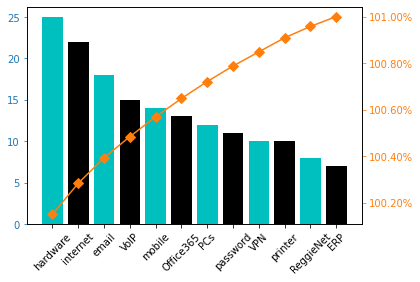

In [5]:
from matplotlib import colors
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

#upload the HelpDesk.csv to your Google Drive
df=pd.read_csv("/content/drive/MyDrive/HelpDesk.csv")
print(df)

#set this column as index - to use as plot labels
df.index = df['reason']
#descending sort
df = df.sort_values(by='frequency', ascending=False)

# comulative percentage column is created using cumsum function
df["comulativePercentage"] = df["frequency"].cumsum()/df["frequency"].sum()+100

#making sure only 2 decimal points are shown
df["cumulativePercentage"]=df["comulativePercentage"].apply(lambda x: round(x,2))
print(df)

fig, ax = plt.subplots()
ax.bar(df.index, df["frequency"], color="c0")

#show labels diagonally
ax.set_xticklabels( df['reason'], rotation=45 )

#ax2 and ax1 will be shown at the same time with twinx
ax2 = ax.twinx()

ax2.plot(df.index, df["comulativePercentage"], color="C1", marker="D", ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")

plt.show()

